In [124]:
import numpy as np
import pygad 

In [125]:
maze = [
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
  [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
  [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0],
  [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
  [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0],
  [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0 ,0],
  [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
  [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
  [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
  [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

In [126]:
from numpy import number


def move(moves):
  coords = [1, 1]
  ending_coords = [10, 10]
  number_of_moves = 0

  for move in moves:
    if coords[0] == ending_coords[0] and coords[1] == ending_coords[1]:
      break

    number_of_moves += 1
    match move:
      case 1:
        newCoords = [coords[0] - 1, coords[1]]
        if maze[newCoords[0]][newCoords[1]] != 0:
          coords = newCoords
      case 2:
        newCoords = [coords[0], coords[1] + 1]
        if maze[newCoords[0]][newCoords[1]] != 0:
          coords = newCoords
      case 3:
        newCoords = [coords[0], coords[1] - 1]
        if maze[newCoords[0]][newCoords[1]] != 0:
          coords = newCoords
      case 4:
        newCoords = [coords[0] + 1, coords[1]]
        if maze[newCoords[0]][newCoords[1]] != 0:
          coords = newCoords
        
  return [coords, number_of_moves]


In [127]:
def fitness_func(solution, solution_idx): 
  coords = [1, 1]
  ending_coords = [10, 10]
  fitness = 0 

  for move in solution:
    if coords[0] == ending_coords[0] and coords[1] == ending_coords[1]:
      fitness -= 1000
      break

    match move:
      case 1:
        newCoords = [coords[0] - 1, coords[1]]
        if maze[newCoords[0]][newCoords[1]] == 0:
          fitness += 5
        else:
          coords = newCoords
      case 2:
        newCoords = [coords[0], coords[1] + 1]
        if maze[newCoords[0]][newCoords[1]] == 0:
          fitness += 5
        else:
          coords = newCoords
      case 3:
        newCoords = [coords[0], coords[1] - 1]
        if maze[newCoords[0]][newCoords[1]] == 0:
          fitness += 5
        else:
          coords = newCoords
      case 4:
        newCoords = [coords[0] + 1, coords[1]]
        if maze[newCoords[0]][newCoords[1]] == 0:
          fitness += 5
        else:
          coords = newCoords
        
  return -fitness + coords[0] * 10 + coords[1] * 10


gene_space = [1, 2, 3, 4]
sol_per_pop = 1000
num_genes = 30

num_parents_mating = 10
num_generations = 100
keep_parents = 5

parent_selection_type = "rank"

crossover_type = "single_point"

mutation_type = "random"

mutation_percent_genes = 2


In [128]:
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria=["saturate_5"]
)
ga_instance.run()

Parameters of the best solution: [2. 3. 2. 3. 2. 2. 4. 2. 2. 2. 1. 2. 2. 4. 4. 4. 4. 4. 2. 2. 4. 2. 4. 4.
 4. 4. 2. 1. 3. 4.]
Fitness value of the best solution = 1195
[[10, 10], 25]


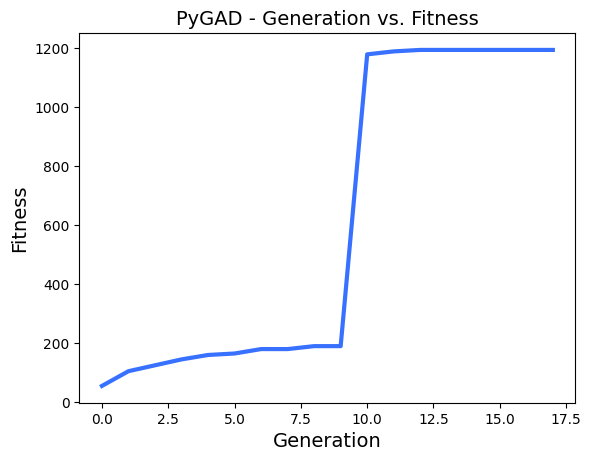

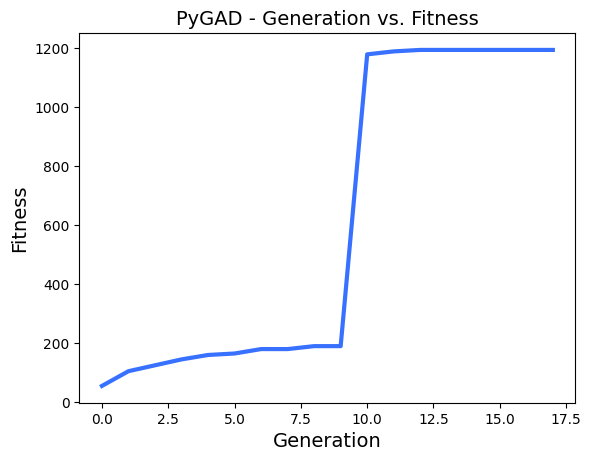

In [129]:
solution, solution_fitness, solution_idx,  = ga_instance.best_solution()

print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))

print(move(solution))
ga_instance.plot_fitness()


In [130]:
import time

times = []

for _ in range(10):
    start = time.time()

    ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria=["saturate_5"]
    )
    ga_instance.run()

    end = time.time()
    times.append(end - start)

print(f"Średni czas: {np.mean(times)}")

Średni czas: 0.211789870262146
